In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# inline plotting
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC

#data processing
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import LabelBinarizer

In [2]:
# get titanic & test csv files as a DataFrame
train_df = pd.read_csv("input/train.csv")
test_df = pd.read_csv("input/test.csv")

# preview the data
train_df.head()
# test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train_df.describe()
#test_df.info()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# checking if there is any missing values in the data sets
train_df.isnull().sum()
#calculation with missing values:When summing data, NA (missing) values will be treated as zero

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test_df.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
train_df['Embarked'].value_counts()
#train_df['Embarked'].mode()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

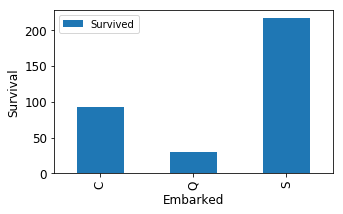

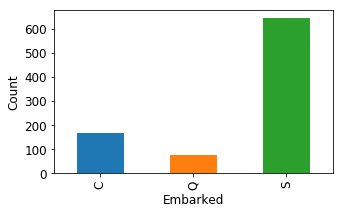

In [8]:
embarked_survival = train_df[['Embarked','Survived']].groupby(["Embarked"]).sum()
ax1 = embarked_survival.plot(kind='bar', figsize=(5, 3), fontsize=12)
ax1.set_xlabel("Embarked", fontsize=12)
ax1.set_ylabel("Survival", fontsize=12)
ax1.plot()
plt.show()
embarked_count = train_df.groupby(["Embarked"])["Ticket"].count()
ax2 = embarked_count.plot(kind='bar', figsize=(5, 3), fontsize=12)
ax2.set_xlabel("Embarked", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)
ax2.plot()
plt.show()

In [9]:
test_average_age = test_df['Age'].dropna().mean()
test_df["Age"] = test_df["Age"].fillna(test_average_age)

In [10]:
train_df.Embarked = train_df.Embarked.fillna("S")
train_df.Embarked.isnull().sum()

0

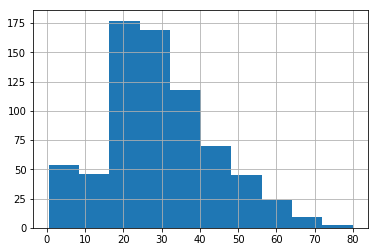

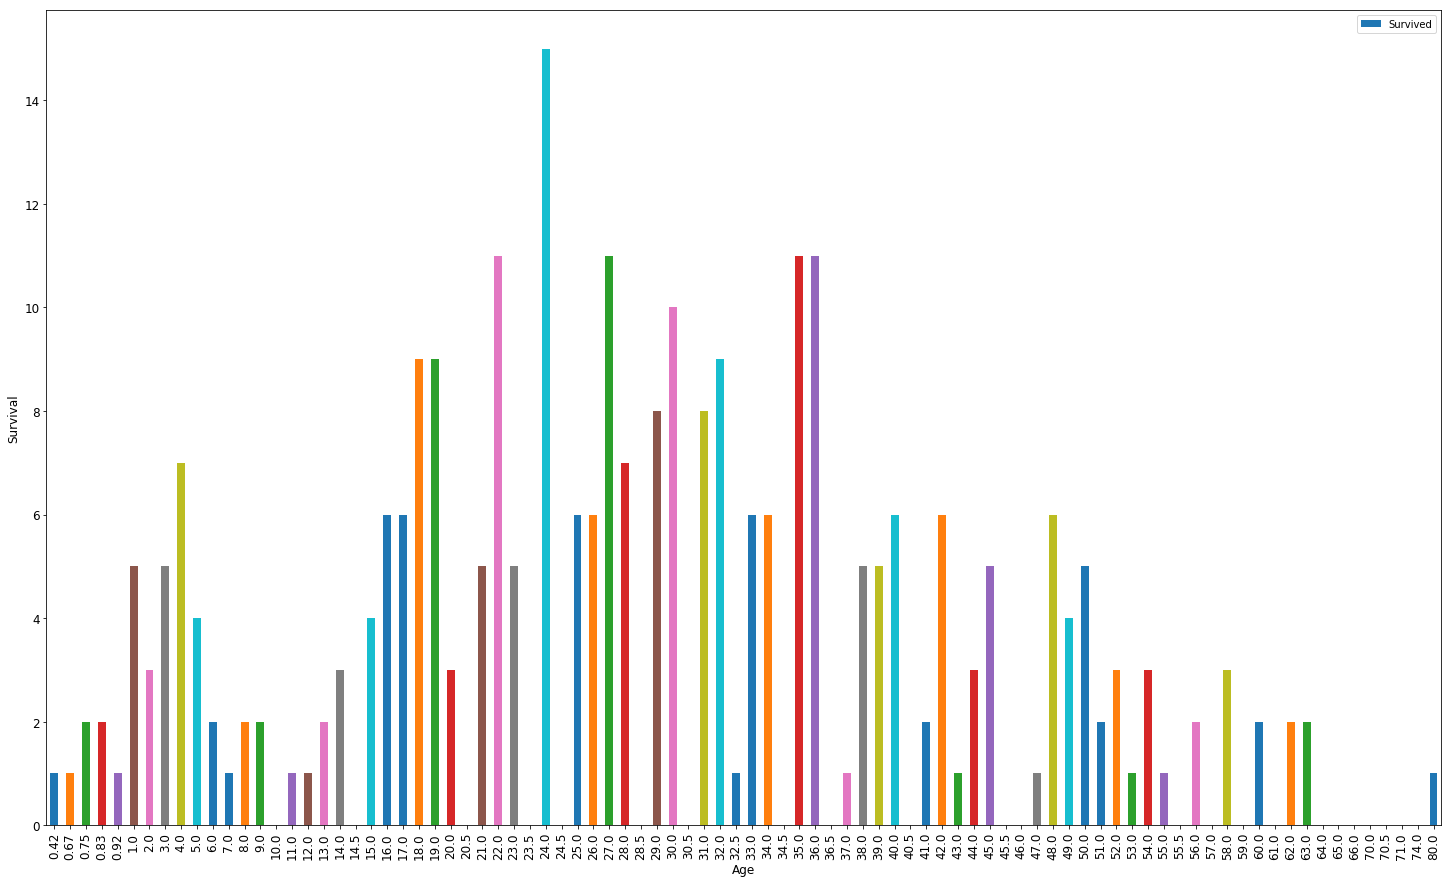

In [11]:
train_df["Age"].dropna().hist()
#available_bikes.plot(x='last_reported', y='num_bikes_available',color='b')
age_survived = train_df[['Age','Survived']].dropna().groupby(['Age'],as_index=False).sum()
ax3 = age_survived.plot(kind='bar',x="Age", y="Survived" , figsize=(25, 15), fontsize=12)
ax3.plot()
ax3.set_xlabel("Age", fontsize=12)
ax3.set_ylabel("Survival", fontsize=12)
plt.show()


In [12]:
train_average_age = train_df['Age'].dropna().mean()
train_df["Age"] = train_df["Age"].fillna(train_average_age)
#train_std_age = train_df["Age"].std()
#train_rand_age = np.random.randint(train_average_age - train_std_age, 
#                                   train_average_age + train_std_age, 
#                                   size = train_df["Age"].isnull.sum())



In [13]:
#cabin doesnt seem to contribute to survival and has a lot of missing values
train_df["Cabin"].isnull().count()


891

In [14]:
# pclass
# embarked_survival = train_df[['Embarked','Survived']].groupby(["Embarked"]).sum()
# ax1 = embarked_survival.plot(kind='bar', figsize=(5, 3), fontsize=12)
# ax1.set_xlabel("Embarked", fontsize=12)
# ax1.set_ylabel("Survival", fontsize=12)
# ax1.plot()
# plt.show()
# embarked_count = train_df.groupby(["Embarked"])["Ticket"].count()
# x2 = embarked_count.plot(kind='bar', figsize=(5, 3), fontsize=12)
# ax2.set_xlabel("Embarked", fontsize=12)
# ax2.set_ylabel("Count", fontsize=12)
# ax2.plot()
# plt.show()


In [15]:
# changing categorical sex column values to numerical 

#train_df['Sex'].replace(["female","male"],[0,1],inplace=True)
train_df['Female'] = (train_df.Sex == "female").astype(int)

test_df['Female'] = (test_df.Sex == "female").astype(int)

In [16]:
train_df['Family'] = train_df["Parch"] + train_df["SibSp"]
train_df['Family'] = (train_df.Family > 0).astype(int)

test_df['Family'] = test_df["Parch"] + test_df["SibSp"]
test_df['Family'] = (test_df.Family > 0).astype(int)

In [17]:
train_df['Child'] = (train_df.Age > 0).astype(int)

test_df['Child'] = (test_df.Age > 0).astype(int)

In [18]:
lb = LabelBinarizer()
train_df['Class1'] = lb.fit_transform(train_df['Pclass'])[:,0]
train_df['Class2'] = lb.fit_transform(train_df['Pclass'])[:,1]
train_df['Class3'] = lb.fit_transform(train_df['Pclass'])[:,2]

test_df['Class1'] = lb.fit_transform(test_df['Pclass'])[:,0]
test_df['Class2'] = lb.fit_transform(test_df['Pclass'])[:,1]
test_df['Class3'] = lb.fit_transform(test_df['Pclass'])[:,2]

In [19]:
test_df["Fare"].fillna(value=0, inplace=True)

In [20]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Female,Family,Child,Class1,Class2,Class3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,0,1,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1,1,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1,1,1,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0,0,1,0,0,1
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q,0,0,1,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,0,0,1,1,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,0,1,1,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,1,1,1,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,1,1,1,0,1,0


In [21]:
# train_x = train_df.drop([''],axis=1)

In [22]:
train_scaling = train_df[["Age","Fare"]].copy()
test_scaling = test_df[["Age","Fare"]].copy()
scaler = MinMaxScaler()
#data = pd.DataFrame(scaler.fit_transform(data.values), columns = data.columns)
train_scaling.loc[:,:] = scaler.fit_transform(train_scaling.values)

test_scaling.loc[:,:] = scaler.fit_transform(test_scaling.values)
test_scaling.head()

,Age,Fare
0,0.452723,0.015282
1,0.617566,0.013663
2,0.815377,0.018909
3,0.353818,0.016908
4,0.287881,0.023984


In [23]:
train_df["Age"] = train_scaling["Age"]
train_df["Fare"] = train_scaling["Fare"]

test_df["Age"] = test_scaling["Age"]
test_df["Fare"] = test_scaling["Fare"]

In [24]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Female,Family,Child,Class1,Class2,Class3
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,0.014151,NaN,S,0,1,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,1,0,PC 17599,0.139136,C85,C,1,1,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0,0,STON/O2. 3101282,0.015469,NaN,S,1,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,113803,0.103644,C123,S,1,1,1,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,0.434531,0,0,373450,0.015713,NaN,S,0,0,1,0,0,1


In [25]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Female,Family,Child,Class1,Class2,Class3
0,892,3,"Kelly, Mr. James",male,0.452723,0,0,330911,0.015282,NaN,Q,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,0.617566,1,0,363272,0.013663,NaN,S,1,1,1,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,0.815377,0,0,240276,0.018909,NaN,Q,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,0.353818,0,0,315154,0.016908,NaN,S,0,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,0.287881,1,1,3101298,0.023984,NaN,S,1,1,1,0,0,1


In [26]:
X_train = train_df[["Age","Fare","Female", "Family","Child","Class1","Class2","Class3"]].copy()
Y_train = train_df[["Survived"]].copy()
X_test = test_df[["Age","Fare","Female", "Family","Child","Class1","Class2","Class3"]].copy()


In [37]:
param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}
c, r = Y_train.values.shape
Y = Y_train.values.reshape(c,)
RFC_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=6)
RFC_fit = RFC_grid.fit(X_train, Y)
best_params = RFC_grid.best_params_
items = best_params
items




{'max_features': 'log2', 'n_estimators': 700}

In [42]:
random_forest = RandomForestClassifier(n_estimators=700, max_features="log2")

random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

#random_forest.score(X_train, Y_train)

/home/mahsarm/Desktop/ML-projects/python3/lib/python3.5/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
# submission_df = pd.DataFrame({"PassengerId": test_df["PassengerId"],"Survived": Y_pred})
# submission_df.head()
# sub_file = submission_df.to_csv('gender_submission.csv', index=False)

In [30]:
#Logistic Regression

logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

# logreg.score(X_train, Y_train)

/home/mahsarm/Desktop/ML-projects/python3/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7934904601571269

In [31]:
#class sklearn.linear_model.LogisticRegression
#(penalty='l2', dual=False, tol=0.0001, C=1.0,
#fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None)

In [43]:
#Support Vector Machines

svc = SVC()

svc.fit(X_train, Y_train)

Y_pred = svc.predict(X_test)

# svc.score(X_train, Y_train)

/home/mahsarm/Desktop/ML-projects/python3/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
from sklearn.grid_search import GridSearchCV
from sklearn import svm

param_grid = [{'kernel': ['rbf'], 'gamma': [1e-1,1e-2,1e-3],
                                   'C': [1, 10, 100, 1000]},
                                  {'kernel': ['linear'], 'C': [0.1, 1, 10, 100]}]
c, r = Y_train.values.shape
Y = Y_train.values.reshape(c,)
svm_grid = GridSearchCV(svm.SVC(), param_grid, cv=6)
svm_fit = svm_grid.fit(X_train, Y)
best_params = svm_grid.best_params_
best_kernel = best_params.get('kernel')
best_C = best_params.get('C')
best_gamma = best_params.get('gamma')
items = best_params
items

/home/mahsarm/Desktop/ML-projects/python3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/mahsarm/Desktop/ML-projects/python3/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [35]:
clf_SVM = svm.SVC(C=1000, gamma=0.1, kernel='rbf')
clf_SVM.fit(X_train, Y_train)
Y_pred = clf_SVM.predict(X_test)

/home/mahsarm/Desktop/ML-projects/python3/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
submission_df = pd.DataFrame({"PassengerId": test_df["PassengerId"],"Survived": Y_pred})
submission_df.head()
sub_file = submission_df.to_csv('gender_submission.csv', index=False)

In [ ]:
# sub= pd.read_csv("input/gender_submission.csv")
# sub.head()